**MileStone2**

**Name-** **Om Late**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("/content/Health1.csv")
data.head()

index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                            NaN                          MD   
4                              E                          DO   

  Gender of the Provider Entity Type of the Provider  \
0                      F                           I   
1                      F                           I   
2                      M                           I   
3                      M                           I   
4                      M                           I   

  Street Address 1 of the Provider Street Address 2 of the Provider  ...  \
0                1402 S GRAND BLVD                   FDT 14TH FLOOR  ...   
1                  2950 VILLAGE DR                              NaN  ...   
2                20 WASHINGTON AVE                          STE 212  ...   
3               5746 N BROADWAY ST                              NaN  ...   
4                 875 MILITARY TRL                        SUITE 200  ...   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   

  HCPCS Drug Indicator Number of Services Number of Medicare Beneficiaries  \
0                    N                 27                               24   
1                    N                175                              175   
2                    N                 32                               13   
3                    N                 20                               18   
4                    N                 33                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758  

[5 ro

In [ ]:
# original data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67325 entries, 0 to 67324
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     67325 non-null  int64  
 1   National Provider Identifier                              67325 non-null  int64  
 2   Last Name/Organization Name of the Provider               67325 non-null  object 
 3   First Name of the Provider                                64477 non-null  object 
 4   Middle Initial of the Provider                            47580 non-null  object 
 5   Credentials of the Provider                               62477 non-null  object 
 6   Gender of the Provider                                    64478 non-null  object 
 7   Entity Type of the Provider                               67325 non-null  object 
 8   Street Address 1

In [ ]:
irrelevant_columns=['Entity Type of the Provider',
 'Street Address 1 of the Provider',
'Street Address 2 of the Provider',
'Zip Code of the Provider',
'Medicare Participation Indicator',
'Place of Service',
'HCPCS Code',
'HCPCS Description',
'HCPCS Drug Indicator',
'Country Code of the Provider']
data=data.drop(columns=irrelevant_columns)

In [ ]:
data.head()

index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                            NaN                          MD   
4                              E                          DO   

  Gender of the Provider City of the Provider State Code of the Provider  \
0                      F          SAINT LOUIS                         MO   
1                      F         FAYETTEVILLE                         NC   
2                      M          NORTH HAVEN                         CT   
3                      M          KANSAS CITY                         MO   
4                      M              JUPITER                         FL   

             Provider Type Number of Services  \
0        Internal Medicine                 27   
1  Obstetrics & Gynecology                175   
2                 Podiatry                 32   
3        Internal Medicine                 20   
4        Internal Medicine                 33   

  Number of Medicare Beneficiaries  \
0                               24   
1                              175   
2                               13   
3                               18   
4                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758

In [ ]:
# Merging the name columns into a single column
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
 data['Middle Initial of the Provider'].fillna('') + ' ' + \
 data['Last Name/Organization Name of the Provider'].fillna('')
data['Full Name'] = data['Full Name'].str.strip()
data = data.drop(columns=['Last Name/Organization Name of the Provider',
 'First Name of the Provider',
'Middle Initial of the Provider'])
full_name_column = data.pop('Full Name')
data.insert(1, 'Full Name', full_name_column)
data.head()

index               Full Name  National Provider Identifier  \
0  8774979  SATYASREE  UPADHYAYULA                    1891106191   
1  3354385           WENDY P JONES                    1346202256   
2  3001884      RICHARD W DUROCHER                    1306820956   
3  7594822         JASPER  FULLARD                    1770523540   
4   746159      ANTHONY E PERROTTI                    1073627758   

  Credentials of the Provider Gender of the Provider City of the Provider  \
0                        M.D.                      F          SAINT LOUIS   
1                        M.D.                      F         FAYETTEVILLE   
2                         DPM                      M          NORTH HAVEN   
3                          MD                      M          KANSAS CITY   
4                          DO                      M              JUPITER   

  State Code of the Provider            Provider Type Number of Services  \
0                         MO        Internal Medicine                 27   
1                         NC  Obstetrics & Gynecology                175   
2                         CT                 Podiatry                 32   
3                         MO        Internal Medicine                 20   
4                         FL        Internal Medicine                 33   

  Number of Medicare Beneficiaries  \
0                               24   
1                              175   
2                               13   
3                               18   
4                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758

In [ ]:
# Uniform format of credentials
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()
data.head()

index               Full Name  National Provider Identifier  \
0  8774979  SATYASREE  UPADHYAYULA                    1891106191   
1  3354385           WENDY P JONES                    1346202256   
2  3001884      RICHARD W DUROCHER                    1306820956   
3  7594822         JASPER  FULLARD                    1770523540   
4   746159      ANTHONY E PERROTTI                    1073627758   

  Credentials of the Provider Gender of the Provider City of the Provider  \
0                          MD                      F          SAINT LOUIS   
1                          MD                      F         FAYETTEVILLE   
2                         DPM                      M          NORTH HAVEN   
3                          MD                      M          KANSAS CITY   
4                          DO                      M              JUPITER   

  State Code of the Provider            Provider Type Number of Services  \
0                         MO        Internal Medicine                 27   
1                         NC  Obstetrics & Gynecology                175   
2                         CT                 Podiatry                 32   
3                         MO        Internal Medicine                 20   
4                         FL        Internal Medicine                 33   

  Number of Medicare Beneficiaries  \
0                               24   
1                              175   
2                               13   
3                               18   
4                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758

# **Converting Object to Numeric**

In [ ]:
numeric_columns = [
 'Number of Services',
 'Number of Medicare Beneficiaries',
 'Number of Distinct Medicare Beneficiary/Per Day Services',
 'Average Medicare Allowed Amount',
 'Average Submitted Charge Amount',
 'Average Medicare Payment Amount',
 'Average Medicare Standardized Amount'
]
for column in numeric_columns:
 data[column] = pd.to_numeric(data[column], errors='coerce')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67325 entries, 0 to 67324
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     67325 non-null  int64  
 1   Full Name                                                 67325 non-null  object 
 2   National Provider Identifier                              67325 non-null  int64  
 3   Credentials of the Provider                               62477 non-null  object 
 4   Gender of the Provider                                    64478 non-null  object 
 5   City of the Provider                                      67325 non-null  object 
 6   State Code of the Provider                                67324 non-null  object 
 7   Provider Type                                             67324 non-null  object 
 8   Number of Servic

In [ ]:
# missing values
print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 4848
Gender of the Provider                                      2847
City of the Provider                                           0
State Code of the Provider                                     1
Provider Type                                                  1
Number of Services                                          1806
Number of Medicare Beneficiaries                             286
Number of Distinct Medicare Beneficiary/Per Day Services    1009
Average Medicare Allowed Amount                              504
Average Submitted Charge Amount                             4478
Average Medicare Payment Amount                              321
Average Medicare Standardized Amount                         319
dtype: int64


In [ ]:
# Imputation of numeric missing values with mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 4848
Gender of the Provider                                      2847
City of the Provider                                           0
State Code of the Provider                                     1
Provider Type                                                  1
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge Amount                                0
Average Medicare Payment Amount                                0
Average Medicare Standardized Amount                           0
dtype: int64


In [ ]:
categorical_columns = ['Credentials of the Provider',
                        'Gender of the Provider',
                        'City of the Provider',
                        'State Code of the Provider']
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
print(data.isnull().sum())

index                                                       0
Full Name                                                   0
National Provider Identifier                                0
Credentials of the Provider                                 0
Gender of the Provider                                      0
City of the Provider                                        0
State Code of the Provider                                  0
Provider Type                                               1
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64


In [ ]:
# Check for duplicates
print(data.duplicated().sum())

0


In [ ]:
data.head()

index               Full Name  National Provider Identifier  \
0  8774979  SATYASREE  UPADHYAYULA                    1891106191   
1  3354385           WENDY P JONES                    1346202256   
2  3001884      RICHARD W DUROCHER                    1306820956   
3  7594822         JASPER  FULLARD                    1770523540   
4   746159      ANTHONY E PERROTTI                    1073627758   

  Credentials of the Provider Gender of the Provider City of the Provider  \
0                          MD                      F          SAINT LOUIS   
1                          MD                      F         FAYETTEVILLE   
2                         DPM                      M          NORTH HAVEN   
3                          MD                      M          KANSAS CITY   
4                          DO                      M              JUPITER   

  State Code of the Provider            Provider Type  Number of Services  \
0                         MO        Internal Medicine                27.0   
1                         NC  Obstetrics & Gynecology               175.0   
2                         CT                 Podiatry                32.0   
3                         MO        Internal Medicine                20.0   
4                         FL        Internal Medicine                33.0   

   Number of Medicare Beneficiaries  \
0                              24.0   
1                             175.0   
2                              13.0   
3                              18.0   
4                              24.0   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                               27.0          
1                                              175.0          
2                                               32.0          
3                                               20.0          
4                                               31.0          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  
0                       157.262222                            160.908889  
1                       118.830000                            135.315257  
2                        64.439688                             60.595937  
3                         3.430000                              3.430000  
4                        19.539394                             19.057576

In [ ]:
def frequency_encode(df, columns):
  for column in columns:
    freq_encoding = df[column].value_counts() / len(df)
    new_column_name = column + '_Freq'
    # Check if column exists before inserting
    if new_column_name not in df.columns:
        df.insert(df.columns.get_loc(column) + 1, new_column_name, df[column].map(freq_encoding))
  return df
columns_to_encode=[ 'Credentials of the Provider',
                    'Gender of the Provider',
                    'Provider Type',
                    'State Code of the Provider']
data = frequency_encode(data, columns_to_encode)
data.head()

index               Full Name  National Provider Identifier  \
0  8774979  SATYASREE  UPADHYAYULA                    1891106191   
1  3354385           WENDY P JONES                    1346202256   
2  3001884      RICHARD W DUROCHER                    1306820956   
3  7594822         JASPER  FULLARD                    1770523540   
4   746159      ANTHONY E PERROTTI                    1073627758   

  Credentials of the Provider  Credentials of the Provider_Freq  \
0                          MD                          0.735130   
1                          MD                          0.735130   
2                         DPM                          0.020160   
3                          MD                          0.735130   
4                          DO                          0.064157   

  Gender of the Provider  Gender of the Provider_Freq City of the Provider  \
0                      F                      0.29227          SAINT LOUIS   
1                      F                      0.29227         FAYETTEVILLE   
2                      M                      0.70773          NORTH HAVEN   
3                      M                      0.70773          KANSAS CITY   
4                      M                      0.70773              JUPITER   

  State Code of the Provider  State Code of the Provider_Freq  \
0                         MO                         0.020049   
1                         NC                         0.035420   
2                         CT                         0.012252   
3                         MO                         0.020049   
4                         FL                         0.073736   

             Provider Type  Provider Type_Freq  Number of Services  \
0        Internal Medicine            0.107039                27.0   
1  Obstetrics & Gynecology            0.010359               175.0   
2                 Podiatry            0.021163                32.0   
3        Internal Medicine            0.107039                20.0   
4        Internal Medicine            0.107039                33.0   

   Number of Medicare Beneficiaries  \
0                              24.0   
1                             175.0   
2                              13.0   
3                              18.0   
4                              24.0   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                               27.0          
1                                              175.0          
2                                               32.0          
3                                               20.0          
4                                               31.0          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  
0                       157.262222                            160.908889  
1                       118.830000                            135.315257  
2                        64.439688                             60.595937  
3                         3.430000                              3.430000  
4                        19.539394                             19.057576

In [ ]:
#Performing Standardization on Numerical Columns
from sklearn.preprocessing import StandardScaler
standardization_columns=['Number of Services',
                         'Number of Medicare Beneficiaries',
                         'Number of Distinct Medicare Beneficiary/Per Day Services',
                         'Average Medicare Allowed Amount',
                         'Average Submitted Charge Amount',
                         'Average Medicare Payment Amount',
                         'Average Medicare Standardized Amount',
                         'Credentials of the Provider_Freq',
                         'Gender of the Provider_Freq',
                         'State Code of the Provider_Freq' ]
# Standardization
standard_scaler = StandardScaler()
data[standardization_columns] = standard_scaler.fit_transform(data[standardization_columns])
data_copy=data.copy()
print("Standardized DataFrame:")
data.head()

Standardized DataFrame:


index               Full Name  National Provider Identifier  \
0  8774979  SATYASREE  UPADHYAYULA                    1891106191   
1  3354385           WENDY P JONES                    1346202256   
2  3001884      RICHARD W DUROCHER                    1306820956   
3  7594822         JASPER  FULLARD                    1770523540   
4   746159      ANTHONY E PERROTTI                    1073627758   

  Credentials of the Provider  Credentials of the Provider_Freq  \
0                          MD                          0.599764   
1                          MD                          0.599764   
2                         DPM                         -1.669524   
3                          MD                          0.599764   
4                          DO                         -1.529881   

  Gender of the Provider  Gender of the Provider_Freq City of the Provider  \
0                      F                    -1.556115          SAINT LOUIS   
1                      F                    -1.556115         FAYETTEVILLE   
2                      M                     0.642626          NORTH HAVEN   
3                      M                     0.642626          KANSAS CITY   
4                      M                     0.642626              JUPITER   

  State Code of the Provider  State Code of the Provider_Freq  \
0                         MO                        -0.737220   
1                         NC                        -0.071283   
2                         CT                        -1.075014   
3                         MO                        -0.737220   
4                         FL                         1.588735   

             Provider Type  Provider Type_Freq  Number of Services  \
0        Internal Medicine            0.107039           -0.507093   
1  Obstetrics & Gynecology            0.010359            0.499225   
2                 Podiatry            0.021163           -0.473096   
3        Internal Medicine            0.107039           -0.554689   
4        Internal Medicine            0.107039           -0.466296   

   Number of Medicare Beneficiaries  \
0                         -0.453682   
1                          1.026912   
2                         -0.561540   
3                         -0.512513   
4                         -0.453682   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                          -0.489294          
1                                           0.526076          
2                                          -0.454991          
3                                          -0.537318          
4                                          -0.461851          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                         1.111962                         0.632324   
1                         0.361687                         1.956171   
2                         0.038764                        -0.184037   
3                        -0.811983                        -0.999251   
4                        -0.587264                        -0.809034   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  
0                         1.012244                              1.037169  
1                         0.578157                              0.750611  
2                        -0.036175                             -0.085982  
3                        -0.725272                             -0.726039  
4                        -0.543318                             -0.551065

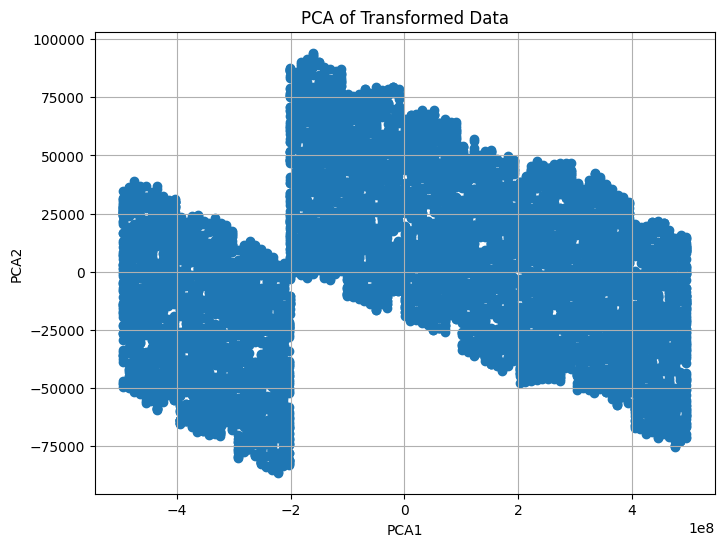

In [ ]:
#Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
df=data.copy()
# Imputation of categorical columns with mode
categorical_columns = ['Full Name',
                        'Credentials of the Provider',
                        'Gender of the Provider',
                        'City of the Provider',
                        'Provider Type',
                        'State Code of the Provider']
for column in df.columns:
 df[column].fillna(df[column].mode()[0], inplace=True)
df = df.drop(columns=categorical_columns)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
# DataFrame of PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
# Scatter plot of PCA1 and PCA2
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Transformed Data')
plt.grid(True)
plt.show()

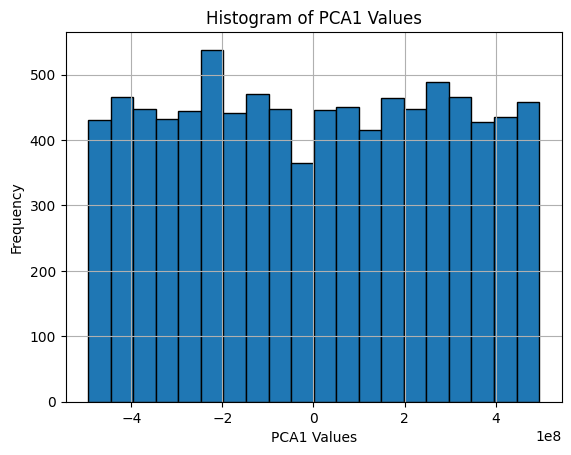

In [ ]:
# Plot PCA1 as a histogram
plt.hist(pca_df['PCA1'], bins=20, edgecolor='black')
plt.xlabel('PCA1 Values')
plt.ylabel('Frequency')
plt.title('Histogram of PCA1 Values')
plt.grid(True)
plt.show()

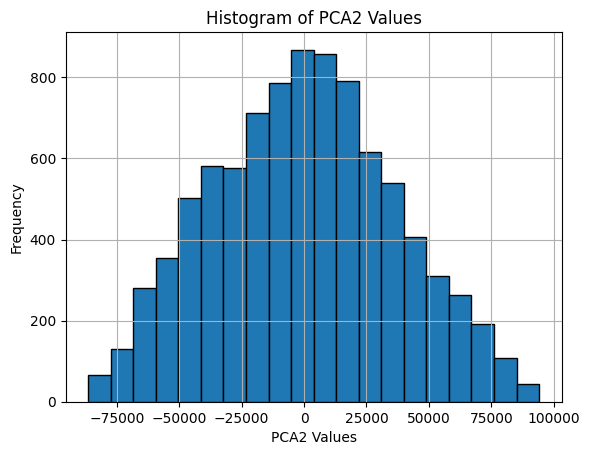

In [ ]:
# Plot PCA2 as a histogram
plt.hist(pca_df['PCA2'], bins=20, edgecolor='black')
plt.xlabel('PCA2 Values')
plt.ylabel('Frequency')
plt.title('Histogram of PCA2 Values')
plt.grid(True)
plt.show()

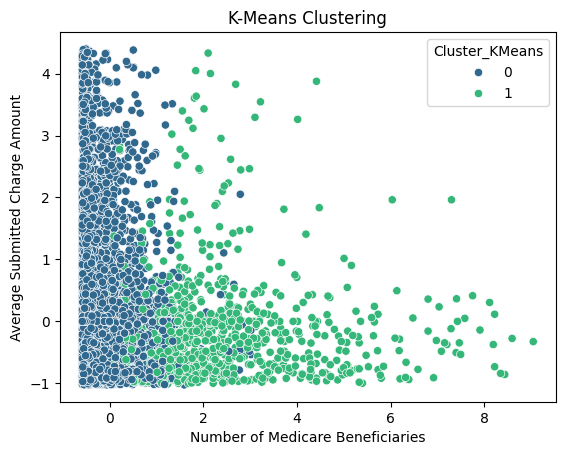

In [ ]:
#CLUSTERING
#K MEANS CLUSTERING
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(data[numeric_columns])
sns.scatterplot(data=data, x='Number of Medicare Beneficiaries', y='Average Submitted Charge Amount',
 hue='Cluster_KMeans', palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.show()

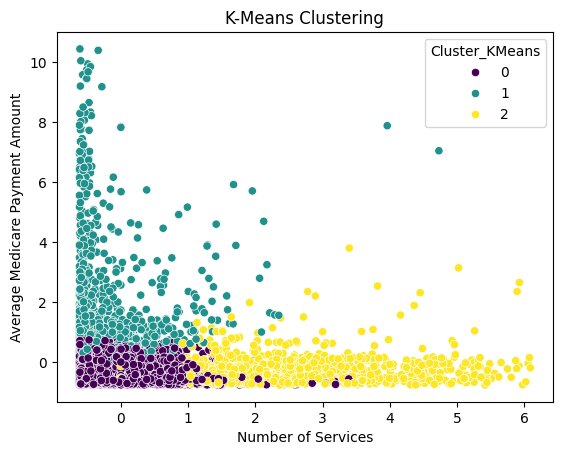

In [ ]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(data[numeric_columns])
sns.scatterplot(data=data, x='Number of Services', y='Average Medicare Payment Amount', hue='Cluster_KMeans',
 palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.show()

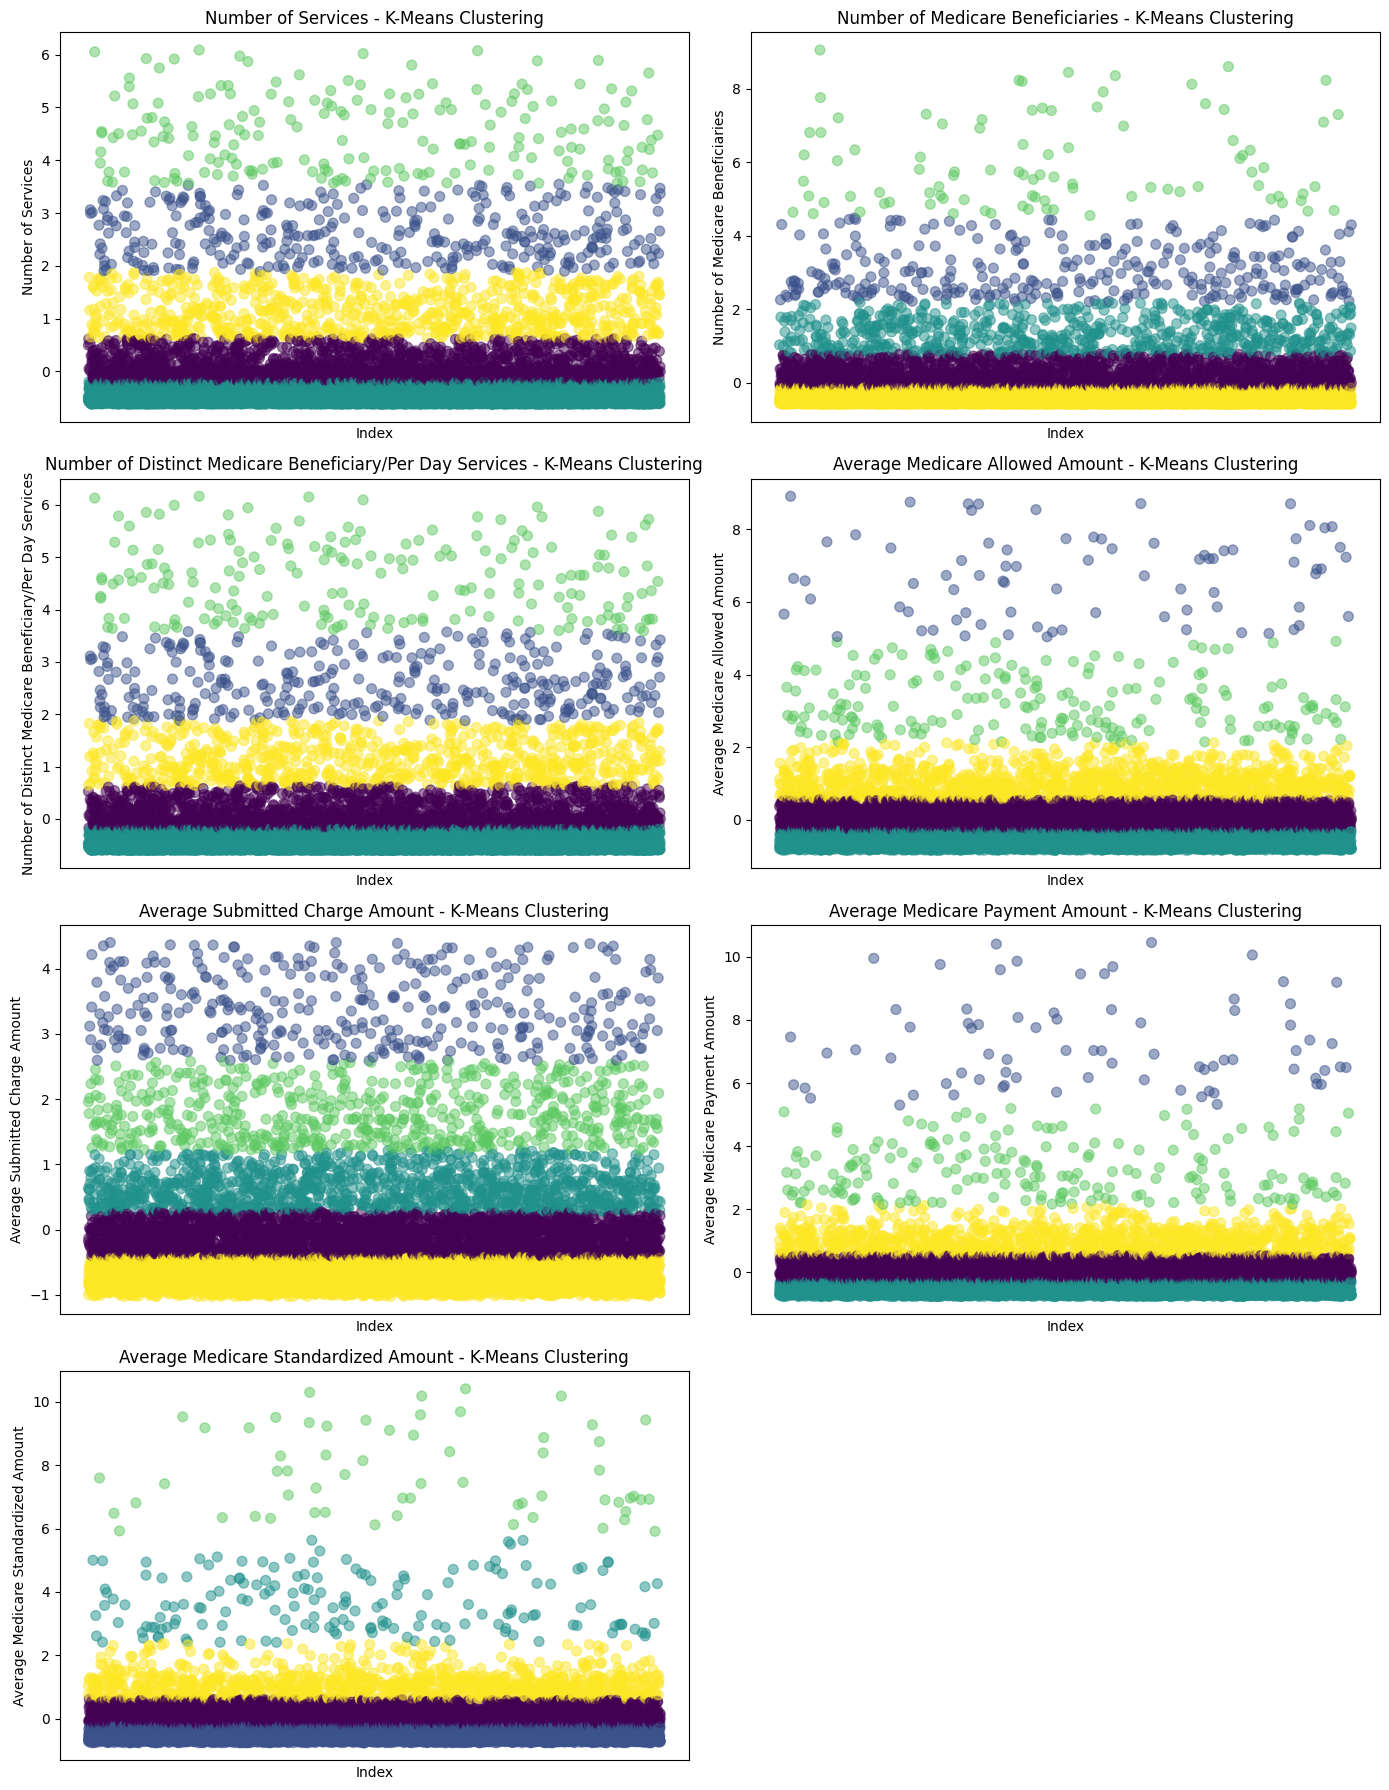

In [ ]:
 #Algoplot of K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
k = 5
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    # Perform K-Means clustering on the current column
    kmeans = KMeans(n_clusters=k, random_state=0)
    data['Cluster'] = kmeans.fit_predict(data[[col]])
    # Plot the column against its K-Means cluster assignments
    ax = axes[i]
    ax.scatter(data.index, data[col], c=data['Cluster'], s=50, alpha=0.5)
    ax.set_title(f'{col} - K-Means Clustering')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.set_xticks([])
if i < len(numeric_columns) - 2:
  ax.set_xticklabels([])
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


Number of noise points: 703


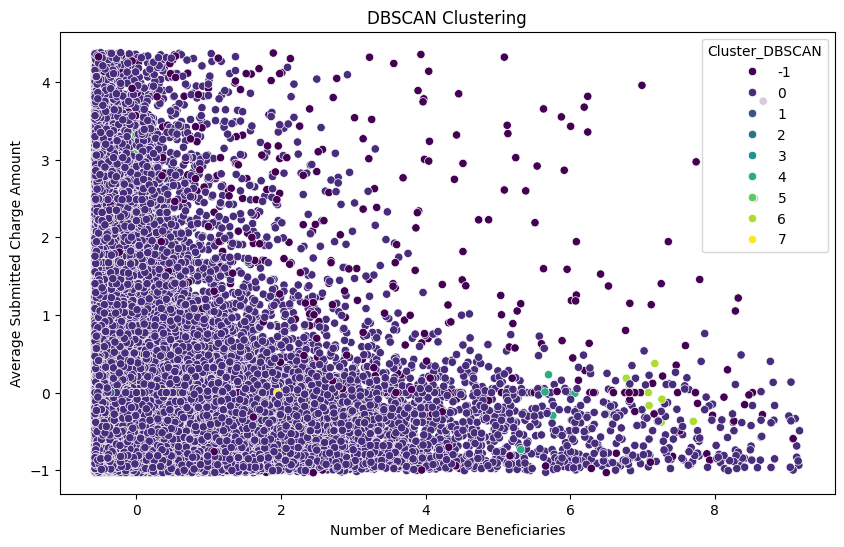

In [ ]:
#DB SCAN CLUSTERING
from sklearn.cluster import DBSCAN
# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=6)
data['Cluster_DBSCAN'] = dbscan.fit_predict(data[numeric_columns])
# Number of noise points
num_noise_points = (data['Cluster_DBSCAN'] == -1).sum()
print(f"Number of noise points: {num_noise_points}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Number of Medicare Beneficiaries', y='Average Submitted Charge Amount',
 hue='Cluster_DBSCAN', palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.show()


Number of noise points: 445


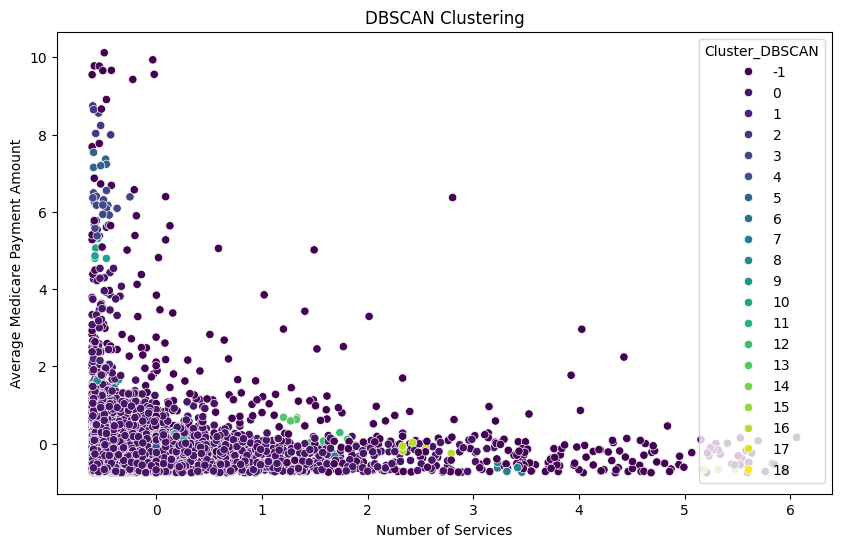

In [112]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
data['Cluster_DBSCAN'] = dbscan.fit_predict(data[numeric_columns])
num_noise_points = (data['Cluster_DBSCAN'] == -1).sum()
print(f"Number of noise points: {num_noise_points}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Number of Services', y='Average Medicare Payment Amount',
 hue='Cluster_DBSCAN', palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.show()

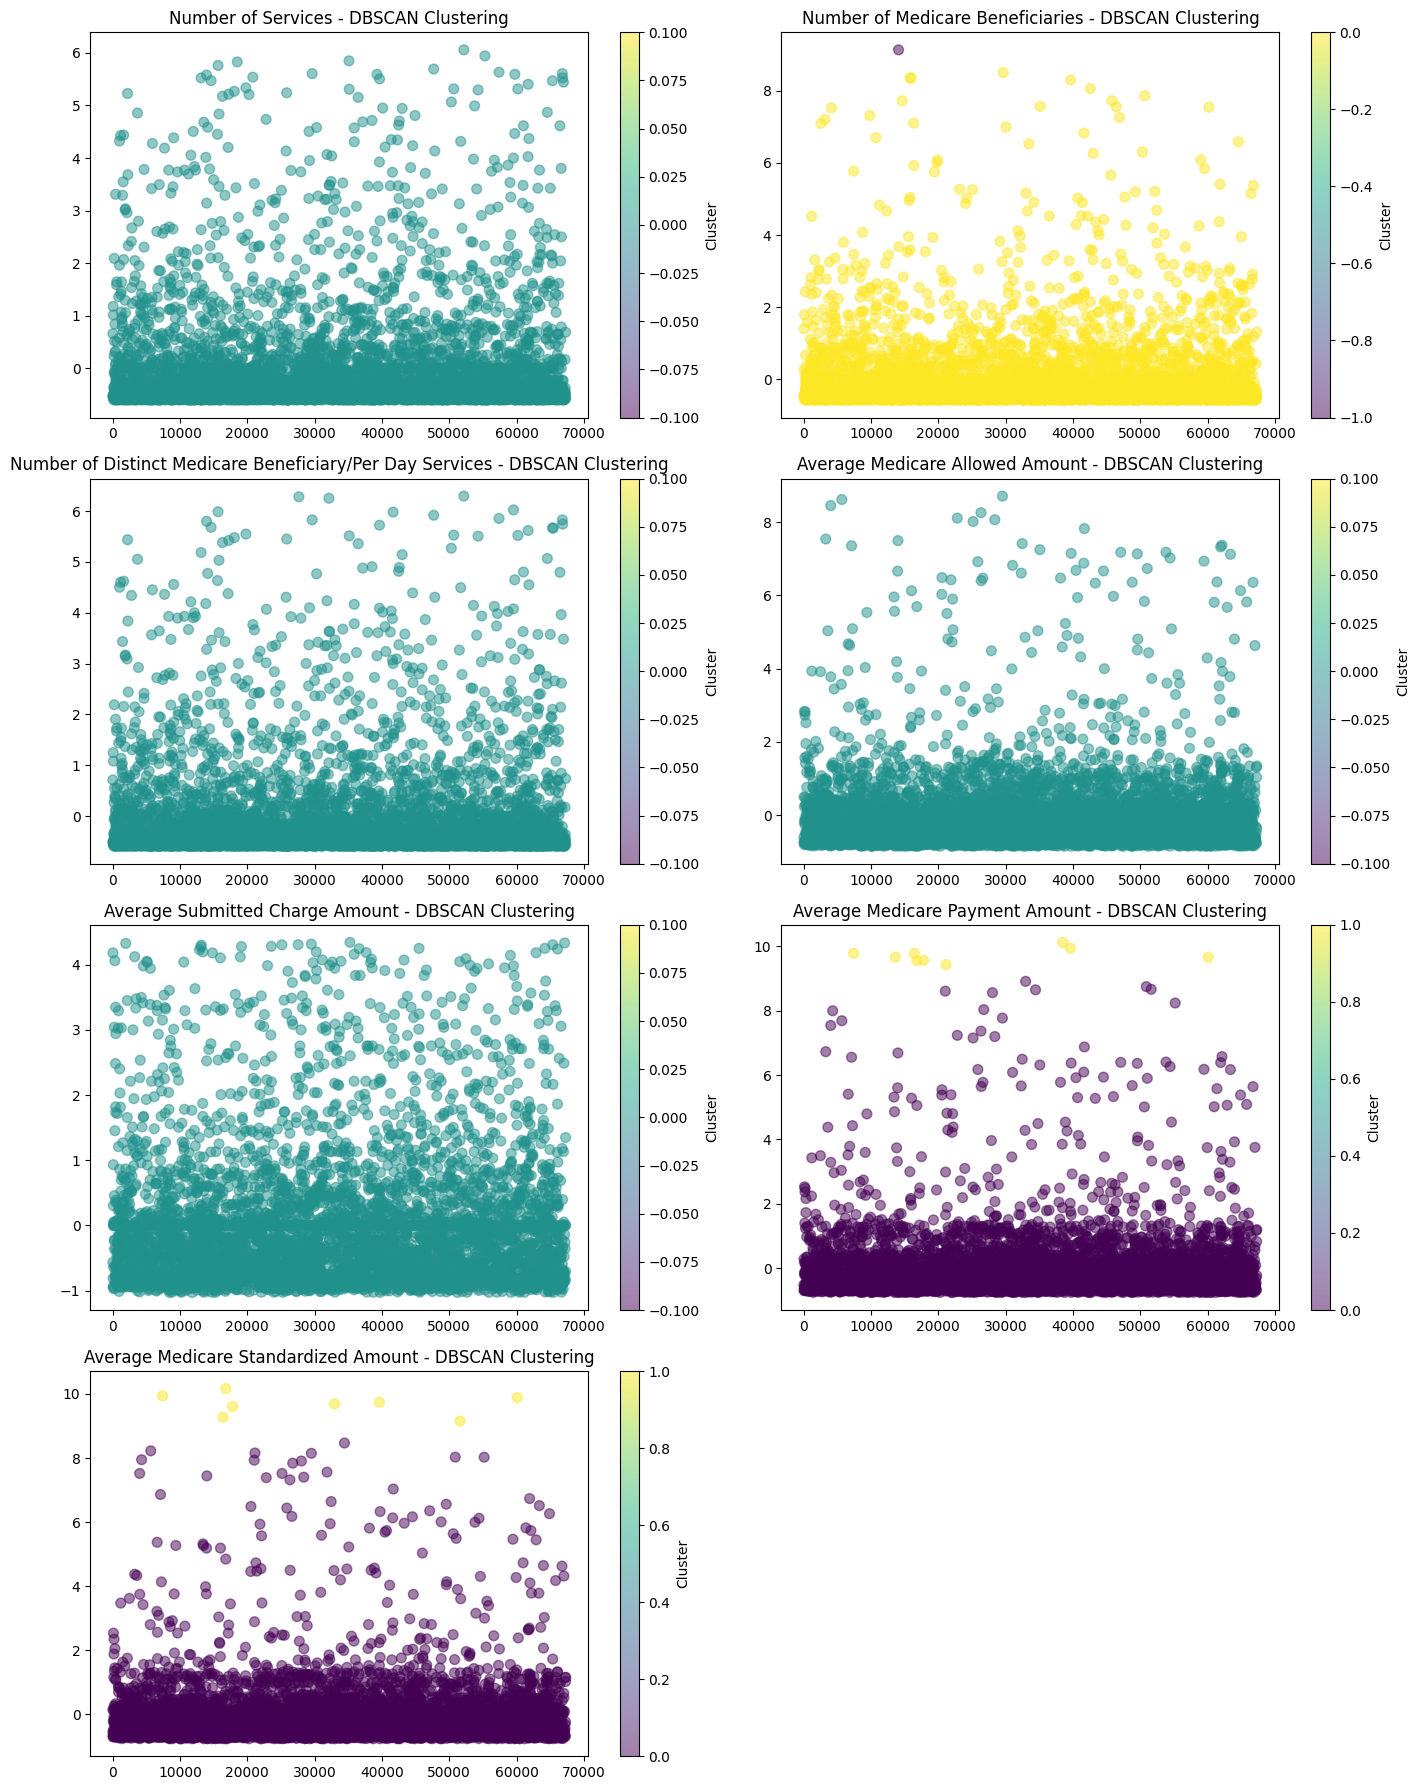

In [113]:
 #Algoplot of DBScan
eps = 0.5
min_samples = 3
data = data[numeric_columns].dropna()
data = data.sample(n=5000, random_state=42)
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    # Perform DBSCAN clustering on the current column
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    # Reshape data to 2D array for DBSCAN
    data_col = data[[col]].values.reshape(-1, 1)
    data['Cluster'] = dbscan.fit_predict(data_col)
    # Plot the column against its DBSCAN cluster assignments
    ax = axes[i]
    scatter = ax.scatter(data.index, data[col], c=data['Cluster'], cmap='viridis', s=50, alpha=0.5)
    ax.set_title(f'{col} - DBSCAN Clustering')

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster')
if i < len(numeric_columns) - 2:
  ax.set_xticklabels([])
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()
